Task 2~

In [1]:
#%pip install pandas  #if not installed
#%pip install matplotlib
%pip install seaborn
#%pip install scikit-learn

import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import numpy as np
#import sklearn a

To read the csv file

In [2]:
df = pd.read_csv('IPL_2023.csv')
df

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,Faf Du Plessis\nRCB,14,14,1,730,84,56.15,475,153.68,0,8,60,36
1,2,Shubman Gill\nGT,14,14,2,680,104*,56.67,446,152.46,2,4,67,22
2,3,Virat Kohli\nRCB,14,14,2,639,101*,53.25,457,139.82,2,6,65,16
3,4,Yashasvi Jaiswal\nRR,14,14,1,625,124,48.08,382,163.61,1,5,82,26
4,5,Devon Conway\nCSK,14,13,2,585,92*,53.18,422,138.62,0,6,69,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,159,Yudhvir Singh\nLSG,3,2,0,1,1,0.50,2,50.00,0,0,0,0
159,160,Noor Ahmad\nGT,10,2,0,1,1,0.50,4,25.00,0,0,0,0
160,161,Fazalhaq Farooqi\nSRH,4,1,1,1,1*,-,5,20.00,0,0,0,0
161,162,Nathan Ellis\nPBKS,10,2,0,1,1,0.50,7,14.28,0,0,0,0


To separate Player name and their respective teams

In [3]:
df[['Player', 'Team']] = df['Player'].str.split('\n', expand=True)
df

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,Team
0,1,Faf Du Plessis,14,14,1,730,84,56.15,475,153.68,0,8,60,36,RCB
1,2,Shubman Gill,14,14,2,680,104*,56.67,446,152.46,2,4,67,22,GT
2,3,Virat Kohli,14,14,2,639,101*,53.25,457,139.82,2,6,65,16,RCB
3,4,Yashasvi Jaiswal,14,14,1,625,124,48.08,382,163.61,1,5,82,26,RR
4,5,Devon Conway,14,13,2,585,92*,53.18,422,138.62,0,6,69,16,CSK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,159,Yudhvir Singh,3,2,0,1,1,0.50,2,50.00,0,0,0,0,LSG
159,160,Noor Ahmad,10,2,0,1,1,0.50,4,25.00,0,0,0,0,GT
160,161,Fazalhaq Farooqi,4,1,1,1,1*,-,5,20.00,0,0,0,0,SRH
161,162,Nathan Ellis,10,2,0,1,1,0.50,7,14.28,0,0,0,0,PBKS


Changing data types

In [4]:
df['HS'] = df['HS'].str.replace('*', '')
df['HS'] = pd.to_numeric(df['HS'])
df

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,Team
0,1,Faf Du Plessis,14,14,1,730,84,56.15,475,153.68,0,8,60,36,RCB
1,2,Shubman Gill,14,14,2,680,104,56.67,446,152.46,2,4,67,22,GT
2,3,Virat Kohli,14,14,2,639,101,53.25,457,139.82,2,6,65,16,RCB
3,4,Yashasvi Jaiswal,14,14,1,625,124,48.08,382,163.61,1,5,82,26,RR
4,5,Devon Conway,14,13,2,585,92,53.18,422,138.62,0,6,69,16,CSK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,159,Yudhvir Singh,3,2,0,1,1,0.50,2,50.00,0,0,0,0,LSG
159,160,Noor Ahmad,10,2,0,1,1,0.50,4,25.00,0,0,0,0,GT
160,161,Fazalhaq Farooqi,4,1,1,1,1,-,5,20.00,0,0,0,0,SRH
161,162,Nathan Ellis,10,2,0,1,1,0.50,7,14.28,0,0,0,0,PBKS


Finding Avg

In [5]:
df["Avg"] = df["Avg"].replace("-", np.nan)

df["Avg"] = df.apply(lambda row: row["Runs"] / (row["Inns"] - row["NO"]) if pd.isnull(row["Avg"]) and (row["Inns"] - row["NO"]) != 0 else row["Avg"], axis=1)
df["Avg"] = df["Avg"].fillna(0)
df['Avg'] = pd.to_numeric(df['Avg'])

df

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,Team
0,1,Faf Du Plessis,14,14,1,730,84,56.15,475,153.68,0,8,60,36,RCB
1,2,Shubman Gill,14,14,2,680,104,56.67,446,152.46,2,4,67,22,GT
2,3,Virat Kohli,14,14,2,639,101,53.25,457,139.82,2,6,65,16,RCB
3,4,Yashasvi Jaiswal,14,14,1,625,124,48.08,382,163.61,1,5,82,26,RR
4,5,Devon Conway,14,13,2,585,92,53.18,422,138.62,0,6,69,16,CSK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,159,Yudhvir Singh,3,2,0,1,1,0.50,2,50.00,0,0,0,0,LSG
159,160,Noor Ahmad,10,2,0,1,1,0.50,4,25.00,0,0,0,0,GT
160,161,Fazalhaq Farooqi,4,1,1,1,1,0.00,5,20.00,0,0,0,0,SRH
161,162,Nathan Ellis,10,2,0,1,1,0.50,7,14.28,0,0,0,0,PBKS


Higher the POS => Lower the 4s~

Text(0, 0.5, '4s')

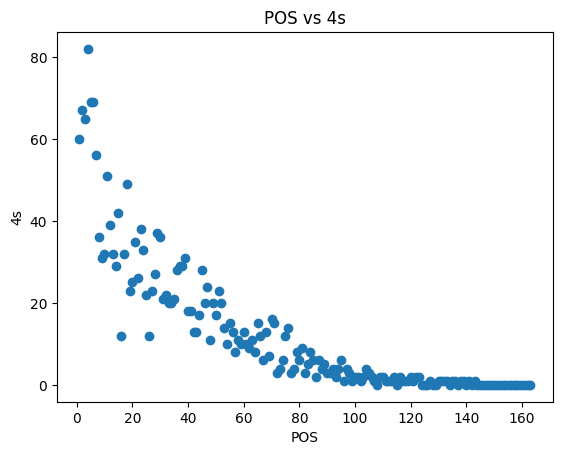

In [6]:
plt.scatter(df['POS'], df['4s'])
plt.title("POS vs 4s")
plt.xlabel('POS')
plt.ylabel('4s')

Mat vs 4s~

Text(0, 0.5, '4s')

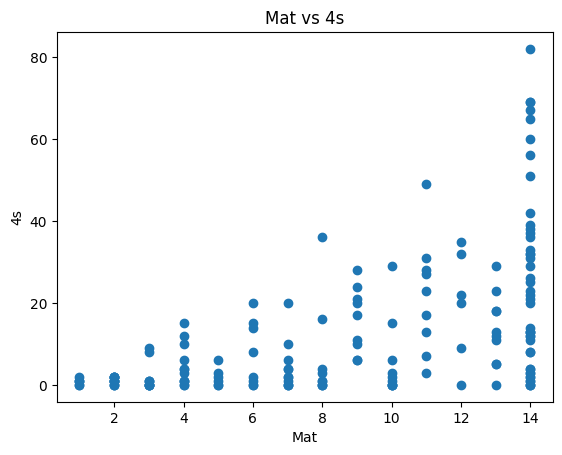

In [7]:
plt.scatter(df['Mat'], df['4s'])
plt.title("Mat vs 4s")
plt.xlabel('Mat')
plt.ylabel('4s')

Inns vs 4s~

Text(0, 0.5, '4s')

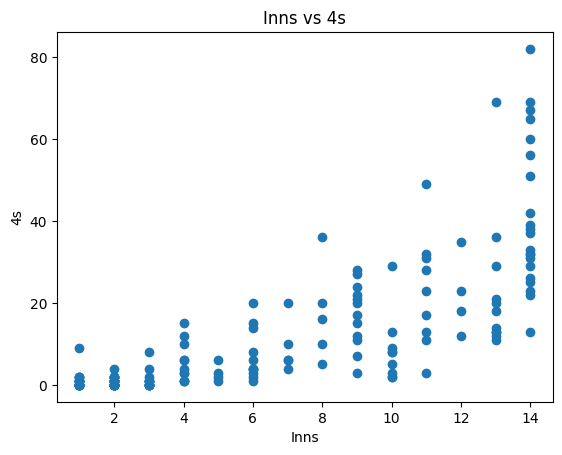

In [8]:
plt.scatter(df['Inns'], df['4s'])
plt.title("Inns vs 4s")
plt.xlabel('Inns')
plt.ylabel('4s')

NO vs 4s

Text(0, 0.5, '4s')

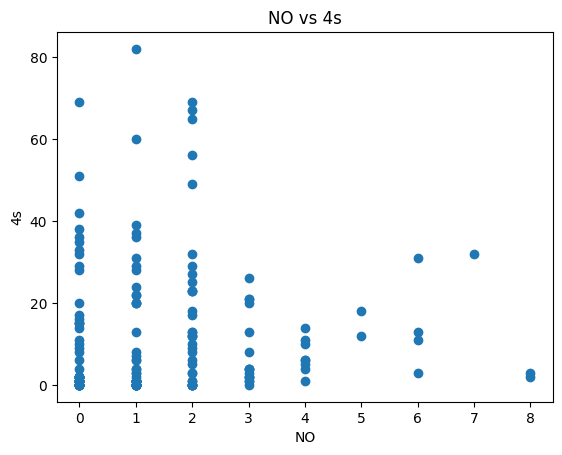

In [9]:
plt.scatter(df['NO'], df['4s'])
plt.title("NO vs 4s")
plt.xlabel('NO')
plt.ylabel('4s')

Runs vs 4s

Text(0, 0.5, '4s')

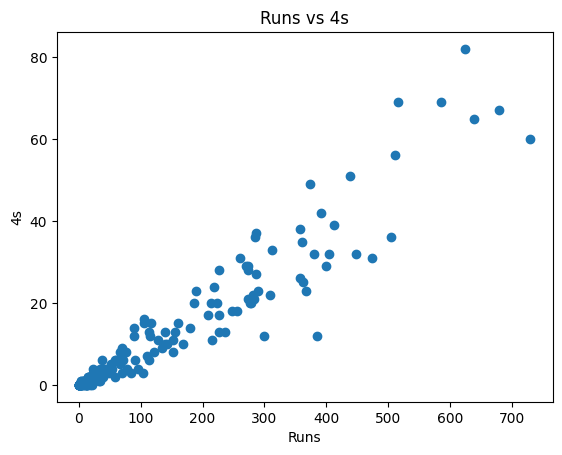

In [10]:
plt.scatter(df['Runs'], df['4s'])
plt.title("Runs vs 4s")
plt.xlabel('Runs')
plt.ylabel('4s')

HS vs 4s

Text(0, 0.5, '4s')

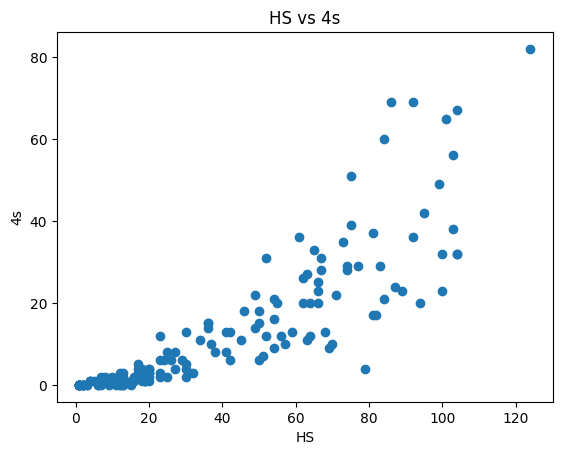

In [11]:
#plt.figure(figsize=(10,6))
plt.scatter(df['HS'], df['4s'])
plt.title("HS vs 4s")
plt.xlabel('HS')
plt.ylabel('4s') 

Avg vs 4s

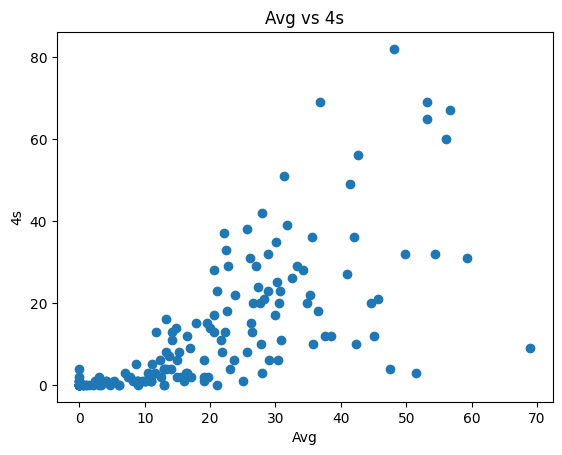

In [12]:
plt.scatter(df['Avg'], df['4s'])
x_ticks = range(len(df))
plt.title("Avg vs 4s")
plt.xlabel('Avg')
plt.ylabel('4s')
plt.show()

BF vs 4s

Text(0, 0.5, '4s')

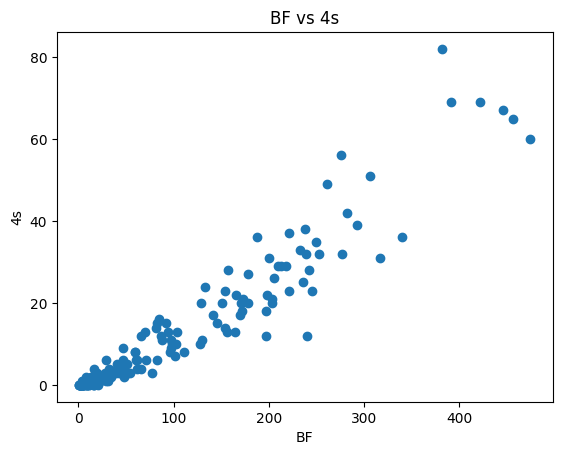

In [13]:
#plt.figure(figsize=(10,6))
plt.scatter(df['BF'], df['4s'])
plt.title("BF vs 4s")
plt.xlabel('BF')
plt.ylabel('4s') 

SR vs 4s

Text(0, 0.5, '4s')

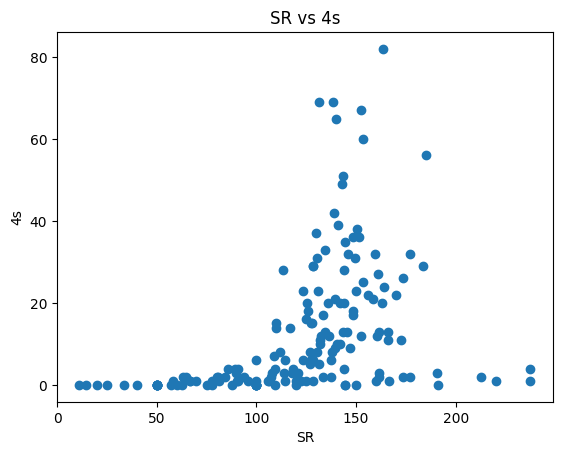

In [14]:
#plt.figure(figsize=(10,6))
plt.scatter(df['SR'], df['4s'])
plt.title("SR vs 4s")
plt.xlabel('SR')
plt.ylabel('4s')

100 vs 4s

Text(0, 0.5, '4s')

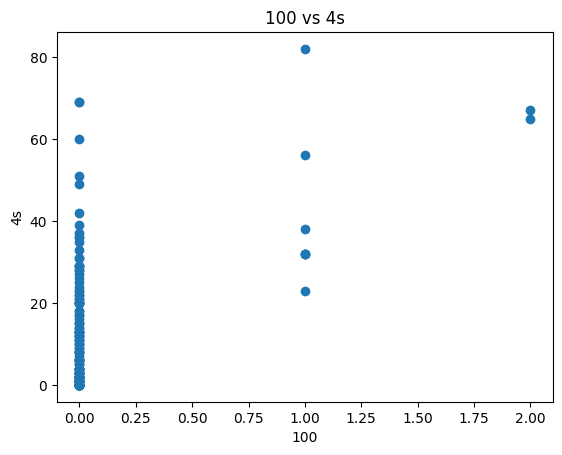

In [15]:
#plt.figure(figsize=(10,6))
plt.scatter(df['100'], df['4s'])
plt.title("100 vs 4s")
plt.xlabel('100')
plt.ylabel('4s') 

50 vs 4s

Text(0, 0.5, '4s')

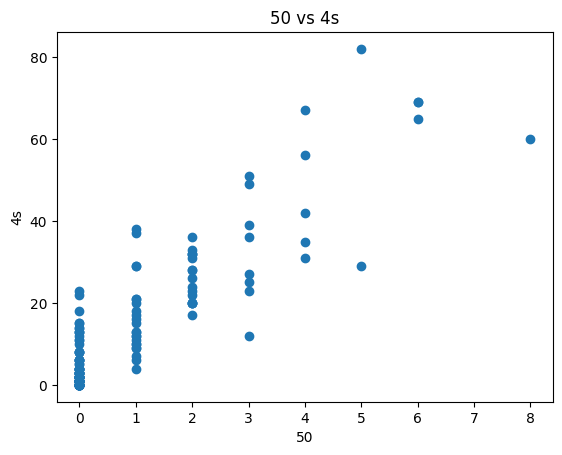

In [16]:
#plt.figure(figsize=(10,6))
plt.scatter(df['50'], df['4s'])
plt.title("50 vs 4s")
plt.xlabel('50')
plt.ylabel('4s') 

6s vs 4s

Text(0, 0.5, '4s')

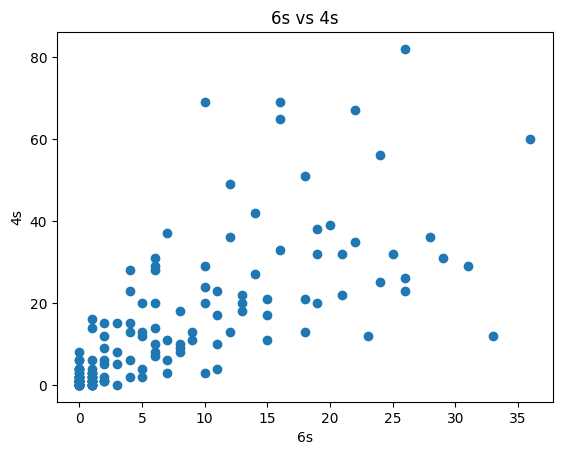

In [17]:
#plt.figure(figsize=(10,6))
plt.scatter(df['6s'], df['4s'])
plt.title("6s vs 4s")
plt.xlabel('6s')
plt.ylabel('4s') 

Correlation Heat Map

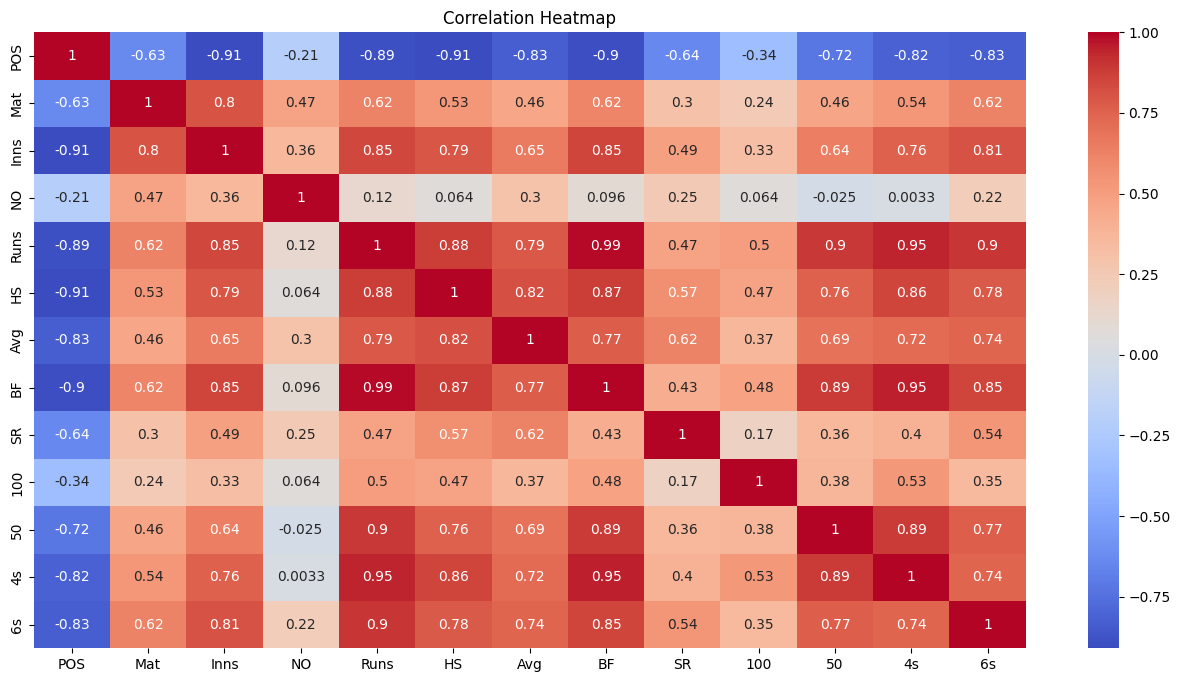

In [18]:
corr_df = df.drop(['Team', 'Player'], axis=1)
corr_matrix = corr_df.corr()

plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

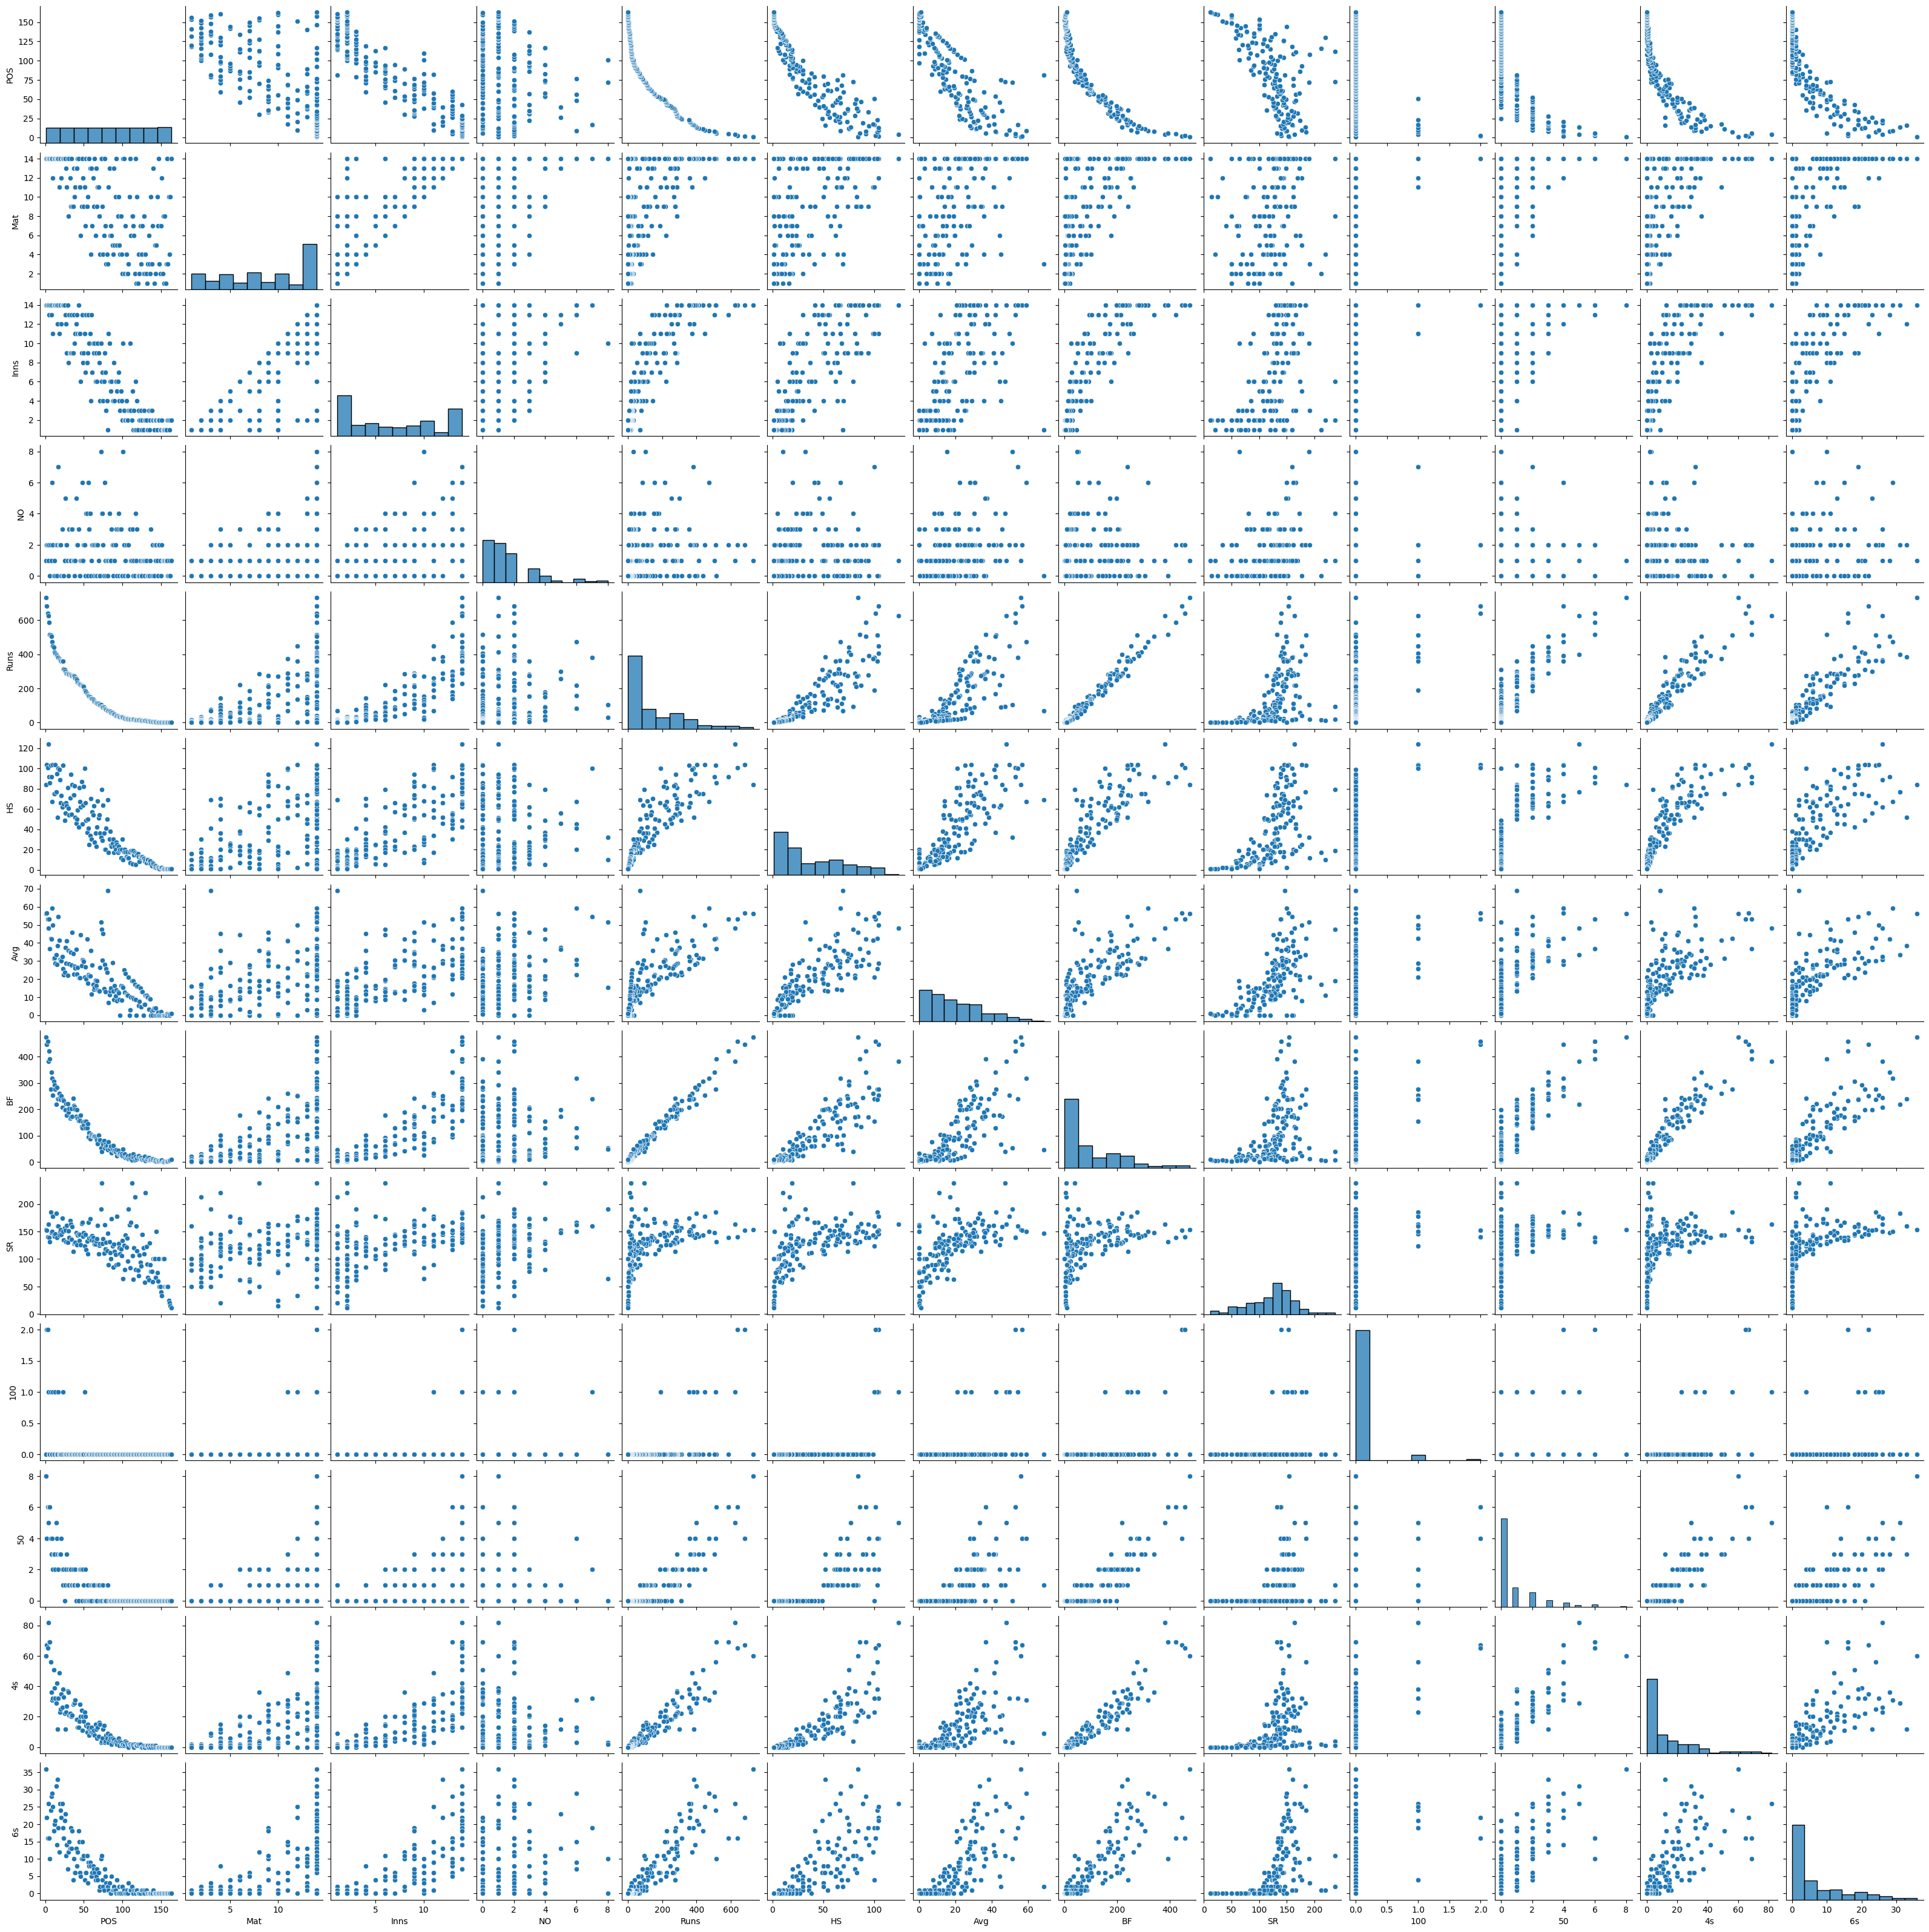

In [19]:
#without regression
sns.pairplot(corr_df, kind="scatter")
plt.show()

Correlation with 4s

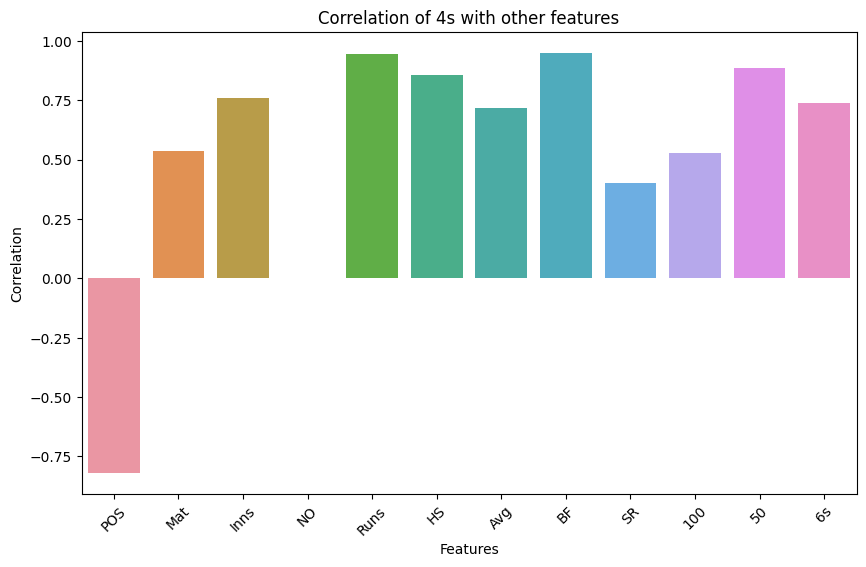

In [20]:
corr_df = df.drop(['Team', 'Player'], axis=1)
corr_matrix = corr_df.corr()

corr_with_4s = corr_matrix['4s']
corr_with_4s = corr_with_4s.drop('4s')

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_4s.index, y=corr_with_4s.values)
plt.title('Correlation of 4s with other features')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

Traning the model, BF as the only feature. To plot

In [21]:
X = corr_df[['BF']].values
y = corr_df['4s'].values

model = LinearRegression()
model.fit(X, y) #To fit method to build the model.
#print()

LinearRegression()

Plotting

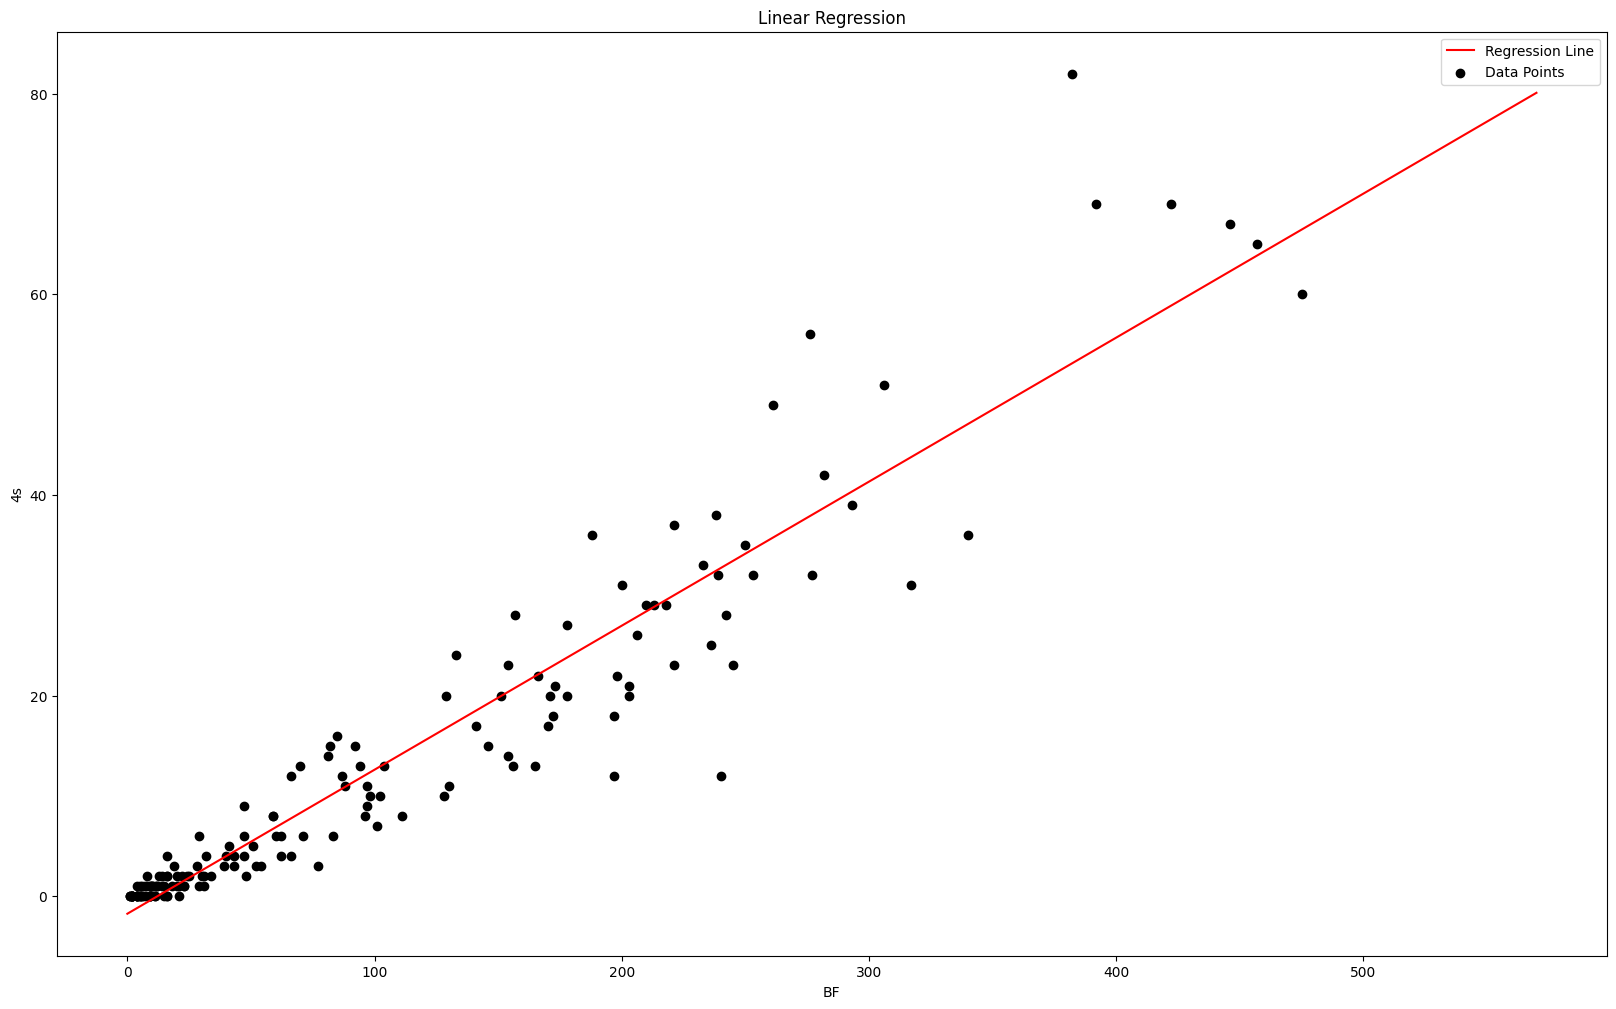

In [22]:
coefficients = model.coef_
intercept = model.intercept_

x = np.linspace(0, 570, 100)
y = coefficients * x + intercept

plt.figure(figsize=(20,12))
plt.plot(x, y, color='red', label='Regression Line')

plt.xlabel('BF')
plt.ylabel('4s')
plt.title('Linear Regression')

plt.scatter(df['BF'], df['4s'], color='black', label='Data Points')

plt.legend()

plt.show()

Splitting the dataset into features (X) and target variable (y)

In [23]:
#X = corr_df[['BF','Runs','HS','50']].values
X = corr_df[['BF']].values
Y = corr_df['4s'].values
#X.reshape(143, 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=397)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(130, 1) (130,)
(33, 1) (33,)


Training with the X_train features

In [24]:
model = LinearRegression()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Finding mean square error

In [25]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Mean Square Error in (Train) data :", mse_train)
print("Mean Square Error in (Test) data  :", mse_test)

Mean Square Error in (Train) data : 26.79919696433956
Mean Square Error in (Test) data  : 28.30390907389891


Plotting the new model

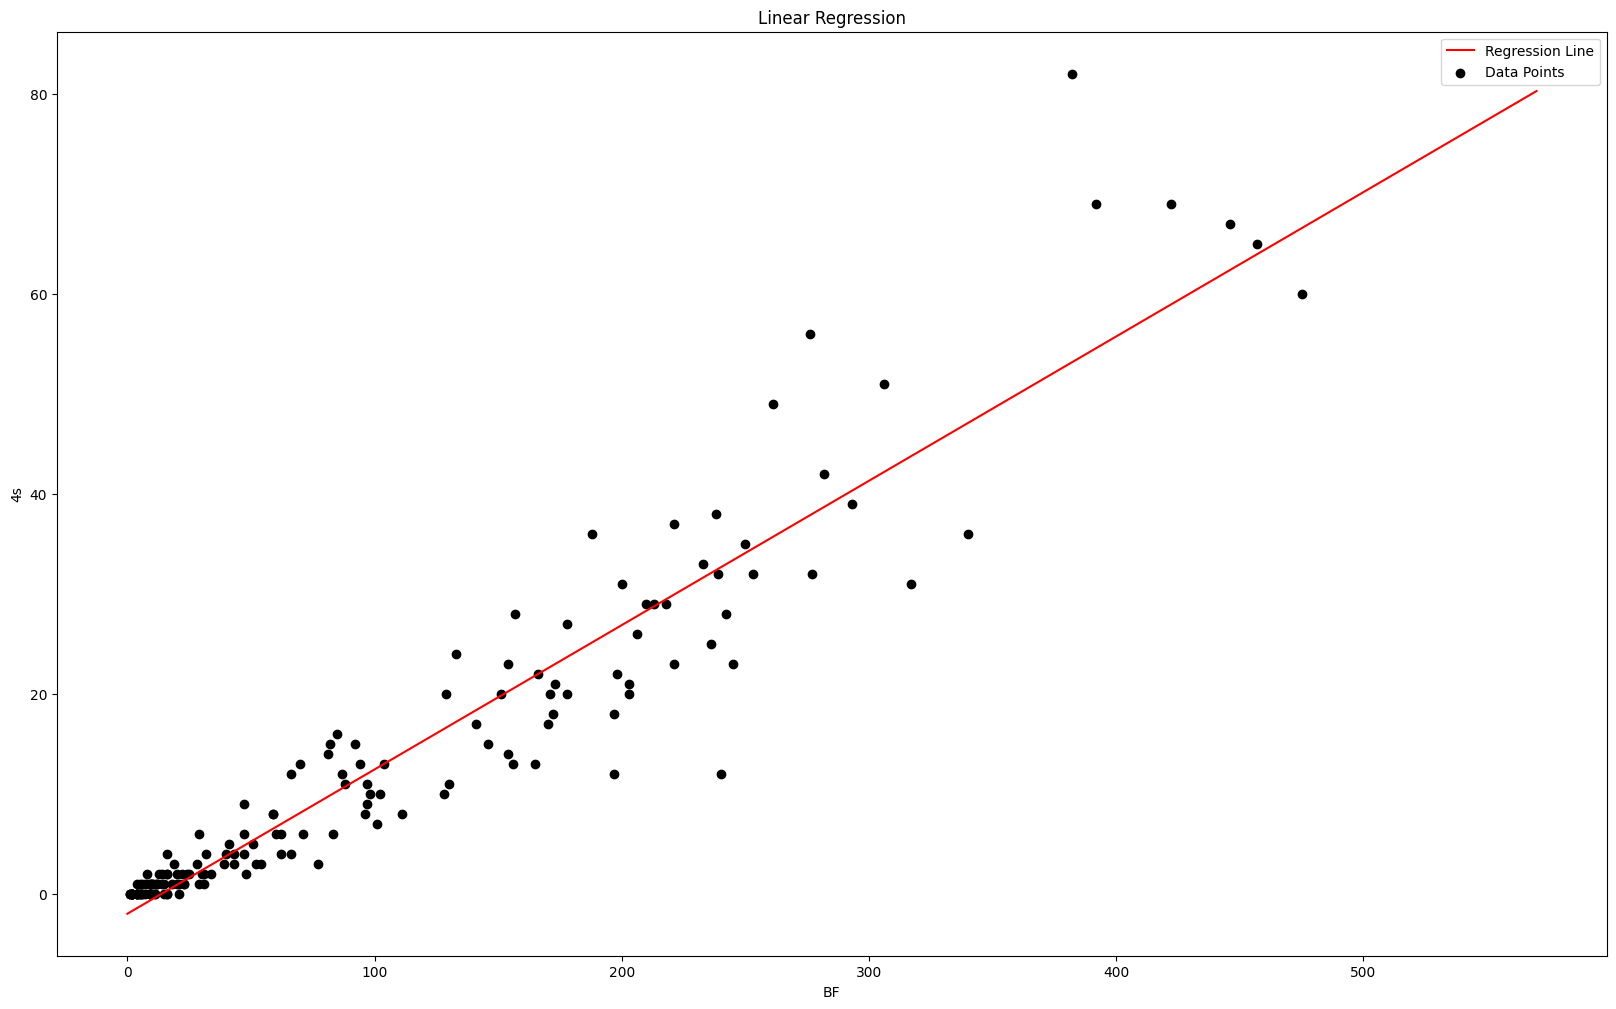

In [26]:
coefficients = model.coef_
intercept = model.intercept_

x = np.linspace(0, 570, 100)
y = coefficients * x + intercept

plt.figure(figsize=(20,12))
plt.plot(x, y, color='red', label='Regression Line')

plt.xlabel('BF')
plt.ylabel('4s')
plt.title('Linear Regression')

plt.scatter(df['BF'], df['4s'], color='black', label='Data Points')

plt.legend()

plt.show()


Printing uniqe value of cols

In [27]:
unique_counts = corr_df.nunique()
unique_counts

POS     163
Mat      14
Inns     14
NO        9
Runs    114
HS       76
Avg     120
BF      110
SR      141
100       3
50        8
4s       46
6s       31
dtype: int64

I believe we can predict the following columns: Runs, BF, POS, 6s, 4s, and 50 because they exhibit a greater magnitude of correlation.

================ next point ===============

To to predict 50s

In [30]:
X = df[['BF','Runs','4s']].values
#X = df[['BF']].values
Y = df['50'].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=739)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

model = LinearRegression()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Mean Square Error in (Train) data :", mse_train)
print("Mean Square Error in (Test) data  :", mse_test)

(130, 3) (130,)
(33, 3) (33,)
Mean Square Error in (Train) data : 0.34596370472036897
Mean Square Error in (Test) data  : 0.5798944562678255


Yes, it is a good method to model the scores since we have a very low mean square error.